In [87]:
import json
import numpy as np
import pandas as pd
import plotly.express as px
import geopandas as gpd
import matplotlib.pyplot as plt

In [99]:
import plotly.io as pio
pio.renderers.default = 'firefox'

<AxesSubplot:>

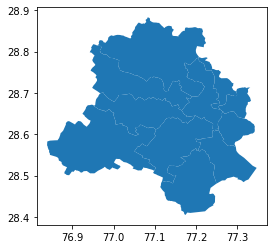

In [88]:
import os
os.environ["SHAPE_RESTORE_SHX"] = "YES"

delhi_map = gpd.read_file("export1-polygon.shp")
delhi_map.plot()

In [89]:
df = pd.read_excel("Delhi_AreaWise_crime_women.xlsx")
df

,Area,Population(2020 est.),Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Total Crime against Women (IPC+SLL),Population(2020 est.).1,Parts per 100000
0,Central,663845,0,4,1,0,0,0,71,139,...,38,39,4,0,0,0,0,604,663845,90.985094
1,East,1948654,0,7,4,0,2,0,213,192,...,48,47,2,0,0,0,0,779,1948654,39.976312
2,North-East,2555451,0,17,6,2,1,0,425,366,...,77,57,0,0,0,1,0,1234,2555451,48.288932
3,North,1012295,1,4,0,0,0,0,165,166,...,38,25,0,0,0,0,0,581,1012295,57.394337
4,North-West,4168454,0,5,1,0,0,0,223,192,...,91,55,3,0,0,0,0,824,4168454,19.767521
5,West,2899297,0,6,3,0,1,0,366,211,...,73,49,3,0,0,0,0,998,2899297,34.422138
6,South-West,2613972,0,6,1,0,0,0,186,223,...,75,21,2,3,1,0,0,758,2613972,28.998015
7,South,1030783,0,7,4,1,0,4,321,277,...,73,46,1,0,0,0,0,1030,1030783,99.924038
8,New Delhi,161885,0,1,1,0,0,0,13,21,...,7,8,0,0,0,0,0,123,161885,75.979862
9,Shahdara,322931,0,3,5,1,0,1,442,208,...,48,21,2,0,0,0,0,989,322931,306.257374


In [90]:
# Assuming df is your DataFrame
columns_to_select = ["Area", "Population(2020 est.)", "Total Crime against Women (IPC+SLL)", "Parts per 100000"]
df = df[columns_to_select]
df = df.rename(columns={"Parts per 100000": "Parts per Lakh"})

In [91]:
delhi_map['common_index'] = range(len(delhi_map))
df['common_index'] = range(len(df))

In [92]:
print(delhi_map)
df

                                             geometry  common_index
0   POLYGON ((77.24949 28.61289, 77.24855 28.61258...             0
1   POLYGON ((77.26427 28.65526, 77.26499 28.65513...             1
2   POLYGON ((77.25756 28.66023, 77.24577 28.66219...             2
3   POLYGON ((77.17352 28.70062, 77.17144 28.70182...             3
4   POLYGON ((77.16236 28.70707, 77.16936 28.70303...             4
5   POLYGON ((77.19256 28.63758, 77.18969 28.63441...             5
6   POLYGON ((77.05465 28.61196, 77.05315 28.61423...             6
7   POLYGON ((77.20497 28.56118, 77.20543 28.56090...             7
8   POLYGON ((77.15191 28.50027, 77.14878 28.49483...             8
9   POLYGON ((77.27446 28.69556, 77.27631 28.69530...             9
10  POLYGON ((77.22342 28.59070, 77.22974 28.59148...            10


,Area,Population(2020 est.),Total Crime against Women (IPC+SLL),Parts per Lakh,common_index
0,Central,663845,604,90.985094,0
1,East,1948654,779,39.976312,1
2,North-East,2555451,1234,48.288932,2
3,North,1012295,581,57.394337,3
4,North-West,4168454,824,19.767521,4
5,West,2899297,998,34.422138,5
6,South-West,2613972,758,28.998015,6
7,South,1030783,1030,99.924038,7
8,New Delhi,161885,123,75.979862,8
9,Shahdara,322931,989,306.257374,9


In [93]:
df = df.drop(index=11)
df

,Area,Population(2020 est.),Total Crime against Women (IPC+SLL),Parts per Lakh,common_index
0,Central,663845,604,90.985094,0
1,East,1948654,779,39.976312,1
2,North-East,2555451,1234,48.288932,2
3,North,1012295,581,57.394337,3
4,North-West,4168454,824,19.767521,4
5,West,2899297,998,34.422138,5
6,South-West,2613972,758,28.998015,6
7,South,1030783,1030,99.924038,7
8,New Delhi,161885,123,75.979862,8
9,Shahdara,322931,989,306.257374,9


AxesSubplot(0.211237,0.125;0.533763x0.755)
AxesSubplot(0.211237,0.125;0.533763x0.755)


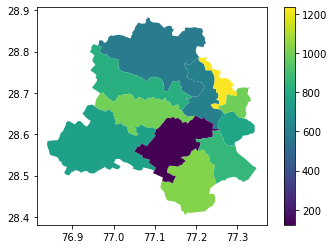

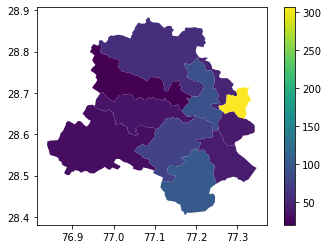

In [94]:
combined_data = delhi_map.merge(df, on="common_index")
print(combined_data.plot(column="Total Crime against Women (IPC+SLL)", legend=True))
print(combined_data.plot(column="Parts per Lakh", legend=True))
# combined_data

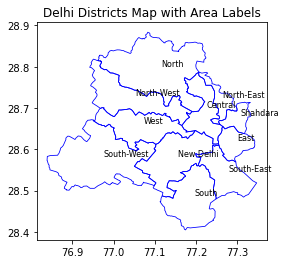

In [95]:
fig, ax = plt.subplots(1, 1)

# Plot the polygons
combined_data.plot(ax=ax, facecolor='none', edgecolor='blue', linewidth=0.8)

# Annotate the polygons with "Area" labels
for x, y, label in zip(combined_data.geometry.centroid.x, combined_data.geometry.centroid.y, combined_data["Area"]):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=8)

# Set plot title
plt.title("Delhi Districts Map with Area Labels")

# Show the plot
plt.show()

In [96]:
combined_data['coords'] = combined_data['geometry'].apply(lambda x: x.representative_point().coords[:])
combined_data['coords'] = [coords[0] for coords in combined_data['coords']]
combined_data

,geometry,common_index,Area,Population(2020 est.),Total Crime against Women (IPC+SLL),Parts per Lakh,coords
0,"POLYGON ((77.24949 28.61289, 77.24855 28.61258...",0,Central,663845,604,90.985094,"(77.23146337815574, 28.699009500000003)"
1,"POLYGON ((77.26427 28.65526, 77.26499 28.65513...",1,East,1948654,779,39.976312,"(77.29827941818031, 28.6117432)"
2,"POLYGON ((77.25756 28.66023, 77.24577 28.66219...",2,North-East,2555451,1234,48.288932,"(77.26685650778668, 28.72330795)"
3,"POLYGON ((77.17352 28.70062, 77.17144 28.70182...",3,North,1012295,581,57.394337,"(77.09809032829239, 28.78722785)"
4,"POLYGON ((77.16236 28.70707, 77.16936 28.70303...",4,North-West,4168454,824,19.767521,"(77.01006262588218, 28.737914449999998)"
5,"POLYGON ((77.19256 28.63758, 77.18969 28.63441...",5,West,2899297,998,34.422138,"(77.08556541088615, 28.6479519)"
6,"POLYGON ((77.05465 28.61196, 77.05315 28.61423...",6,South-West,2613972,758,28.998015,"(76.97915298462692, 28.58644805)"
7,"POLYGON ((77.20497 28.56118, 77.20543 28.56090...",7,South,1030783,1030,99.924038,"(77.19636520348229, 28.485169399999997)"
8,"POLYGON ((77.15191 28.50027, 77.14878 28.49483...",8,New Delhi,161885,123,75.979862,"(77.12433085951358, 28.5632879)"
9,"POLYGON ((77.27446 28.69556, 77.27631 28.69530...",9,Shahdara,322931,989,306.257374,"(77.29850776650815, 28.6758661)"


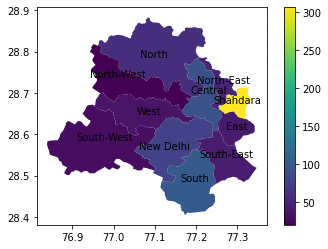

In [100]:
combined_data.plot(column="Parts per Lakh", legend=True)
for idx, row in combined_data.iterrows():
    plt.annotate(text=row['Area'], xy=row['coords'], horizontalalignment='center')